In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

In [15]:
n_runs = 20 #10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
ns = ns[::2]
#ns = 1000
testResults = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), 
                                             n_varSources=50, nStaticSources=ns,
                                             templateNoNoise=False, skyLimited=False,
                                             sky=[300., 300.], sourceFluxRange=(500,30000),
                                             avoidAllOverlaps=0., variablesAvoidBorder=3.5, 
                                             zogyImageSpace=False,
                                             n_runs=n_runs, remeasurePsfs=[False, False],
                                             printErrs=True)

RUNNING: 260
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 16.1min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 260 out of 260 | elapsed: 25.9min finished


OLD (before changing delta=1. to delta=0.):
```
TP:
                     mean       std
ALstack         31.638462  4.559353
ALstack_decorr  19.342308  4.387827
SZOGY           20.761538  4.424055
ZOGY            22.276923  4.362025
```

TP:
                     mean       std
ALstack         31.638462  4.559353
ALstack_decorr  19.292308  4.405939
SZOGY           20.761538  4.424055
ZOGY            22.276923  4.362025
FP:
                     mean       std
ALstack         11.853846  3.173519
ALstack_decorr   4.080769  1.832044
SZOGY            7.730769  2.426649
ZOGY             5.242308  2.020870
FN:
                     mean       std
ALstack         18.288462  4.637170
ALstack_decorr  30.634615  4.474850
SZOGY           29.165385  4.519323
ZOGY            27.650000  4.443185


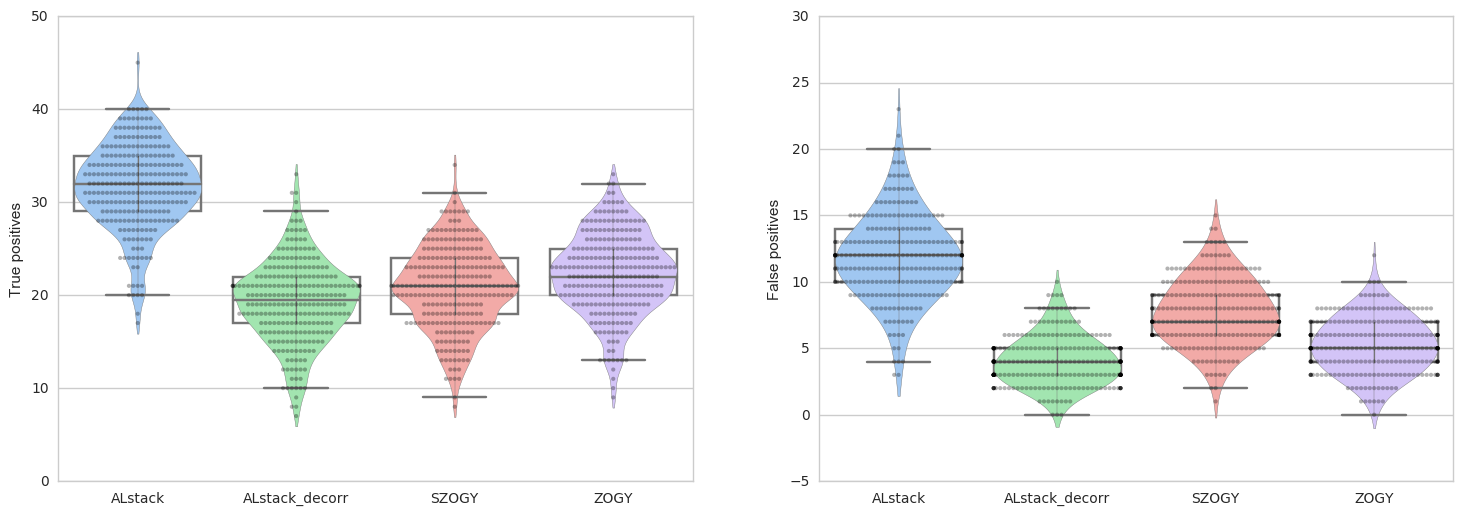

In [17]:
TP, FP, FN = dit.multi.plotResults(testResults);

In [18]:
import scipy.stats
print scipy.stats.ks_2samp(TP.ALstack_decorr.values, TP.ZOGY.values)
print scipy.stats.ks_2samp(TP.ALstack.values, TP.ZOGY.values)
print scipy.stats.ks_2samp(TP.SZOGY.values, TP.ZOGY.values)

print scipy.stats.ttest_ind(TP.ALstack_decorr.values, TP.ZOGY.values)

Ks_2sampResult(statistic=0.29615384615384616, pvalue=1.4823153242721252e-10)
Ks_2sampResult(statistic=0.72307692307692306, pvalue=8.1933942636274349e-61)
Ks_2sampResult(statistic=0.1538461538461538, pvalue=0.0036925294323973891)
Ttest_indResult(statistic=-7.762218093513928, pvalue=4.4853243427354291e-14)


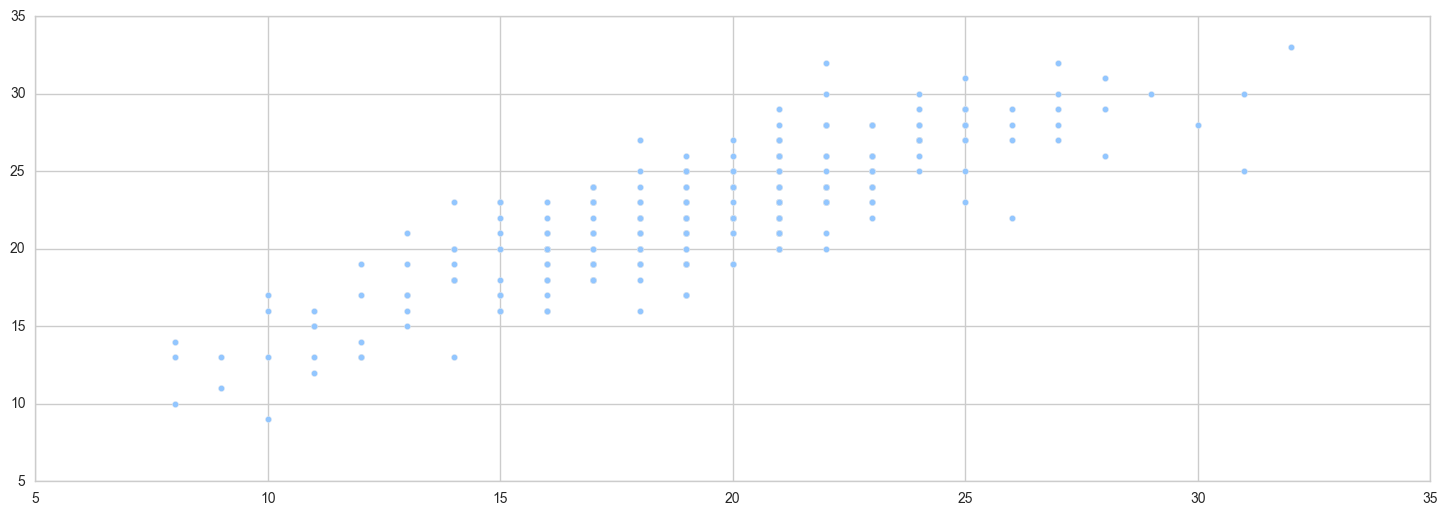

In [23]:
#TP.plot.scatter(x='ALstack_decorr', y='ZOGY')
plt.scatter(TP.ALstack_decorr.values, TP.ZOGY.values)

In [32]:
print ((TP.ZOGY.values+1e-9)/(TP.ALstack_decorr.values+1e-9)).max()
TP.iloc[((TP.ZOGY.values+1e-9)/(TP.ALstack_decorr.values+1e-9)) > 1.5]

1.74999999991


,ALstack,ALstack_decorr,SZOGY,ZOGY
139,28,14,20,23
220,35,15,23,23
221,33,15,20,23
229,30,13,20,21
237,36,10,13,16
238,32,10,13,17
246,18,8,8,14
247,21,8,11,13
255,30,12,15,19


In [33]:
testResults[139]

{'df': None,
 'flux': 876.81240867131896,
 'n_sources': 2750,
 'n_varSources': 50,
 'resultInputPsf': {'ALstack': {'FN': 22, 'FP': 10, 'TP': 28},
  'ALstack_decorr': {'FN': 36, 'FP': 9, 'TP': 14},
  'SZOGY': {'FN': 30, 'FP': 8, 'TP': 20},
  'ZOGY': {'FN': 27, 'FP': 4, 'TP': 23}},
 'resultMeasuredPsf': None,
 'scienceSNR': 6.772293248003062,
 'scienceSNR_measuredPsf': 6.772293248003062,
 'seed': 85,
 'sky': [300.0, 300.0],
 'skyLimited': False,
 'templateNoNoise': False,
 'templateSNR': 10.322078578507977,
 'templateSNR_measuredPsf': 10.322078578507977}

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

import diffimTests as dit

In [2]:
tr = dit.multi.runTest(flux=620.*np.sqrt(2.), 
                       n_varSources=50, n_sources=2750, seed=85,
                       templateNoNoise=False, skyLimited=False,
                       sky=[300., 300.], sourceFluxRange=(500,30000),
                       avoidAllOverlaps=0., variablesAvoidBorder=3.5, 
                       zogyImageSpace=False, remeasurePsfs=[False, False],
                       printErrs=True, returnObjs=True)

OLD result with `alardMinSig=0.7` (default):
```
{'ALstack': {'FN': 22, 'FP': 10, 'TP': 28},
 'ALstack_decorr': {'FN': 35, 'FP': 8, 'TP': 15},
 'SZOGY': {'FN': 30, 'FP': 8, 'TP': 20},
 'ZOGY': {'FN': 27, 'FP': 4, 'TP': 23}}
 ```
 Result with `alardMinSig=0.55`:
 ```
 {'ALstack': {'FN': 21, 'FP': 9, 'TP': 29},
 'ALstack_decorr': {'FN': 33, 'FP': 5, 'TP': 17},
 'SZOGY': {'FN': 30, 'FP': 8, 'TP': 20},
 'ZOGY': {'FN': 27, 'FP': 4, 'TP': 23}}
 ```

In [3]:
# This is a result using alardMinSig=0.55.
tr['resultInputPsf']

{'ALstack': {'FN': 21, 'FP': 9, 'TP': 29},
 'ALstack_decorr': {'FN': 33, 'FP': 5, 'TP': 17},
 'SZOGY': {'FN': 30, 'FP': 8, 'TP': 20},
 'ZOGY': {'FN': 27, 'FP': 4, 'TP': 23}}

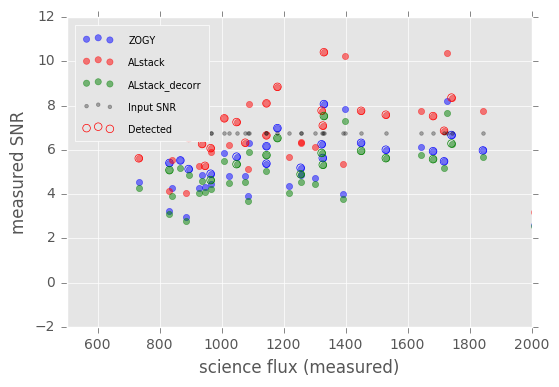

In [4]:
df, _ = tr['objs'][0].doPlotWithDetectionsHighlighted(runTestResult=tr['resultInputPsf'], xaxisIsScienceForcedPhot=True)
plt.xlim(500, 2000);

In [5]:
df.head()

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,ZOGY_detected,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected
0,876.812409,302.873509,1254.969101,1,388.263103,431.269023,6.772293,5.188425,863.671311,166.461176,True,6.327413,834.681987,131.915199,False,4.895584,826.856026,168.898337,True
1,876.812409,1084.532174,2831.069778,2,259.038514,218.080336,6.772293,5.424475,936.053159,172.561053,True,6.586642,903.876626,137.228752,True,5.138871,902.453397,175.613156,True
2,876.812409,3092.948502,4053.098860,3,388.513163,233.733978,6.772293,3.134795,577.827726,184.327107,False,4.167039,600.200882,144.035357,False,3.127389,577.292670,184.592557,False
3,876.812409,-104.538902,1180.254892,4,402.009467,167.386174,6.772293,6.977535,1145.963755,164.236190,True,8.842942,1159.978635,131.175645,True,6.527347,1095.808586,167.879618,True
4,876.812409,336.654418,1644.054745,5,167.882373,323.488653,6.772293,6.108666,1016.422218,166.390205,False,7.764591,1029.009625,132.525931,False,5.751747,975.055009,169.523273,False


A&L(dec): stats(mean=0.2473502, stdev=25.516024, min=-87.113091, max=81.651482)
ZOGY: stats(mean=0.047846539291040914, stdev=24.849431306697134, min=-116.06617424288513, max=135.41133227772818)
A&L(dec) - ZOGY: stats(mean=0.055373727553327173, stdev=1.9878387862057614, min=-5.9658998366853169, max=14.52915671394058)
A&L(dec) - A&L: stats(mean=-0.028450344, stdev=6.9150653, min=-35.248299, max=39.766861)


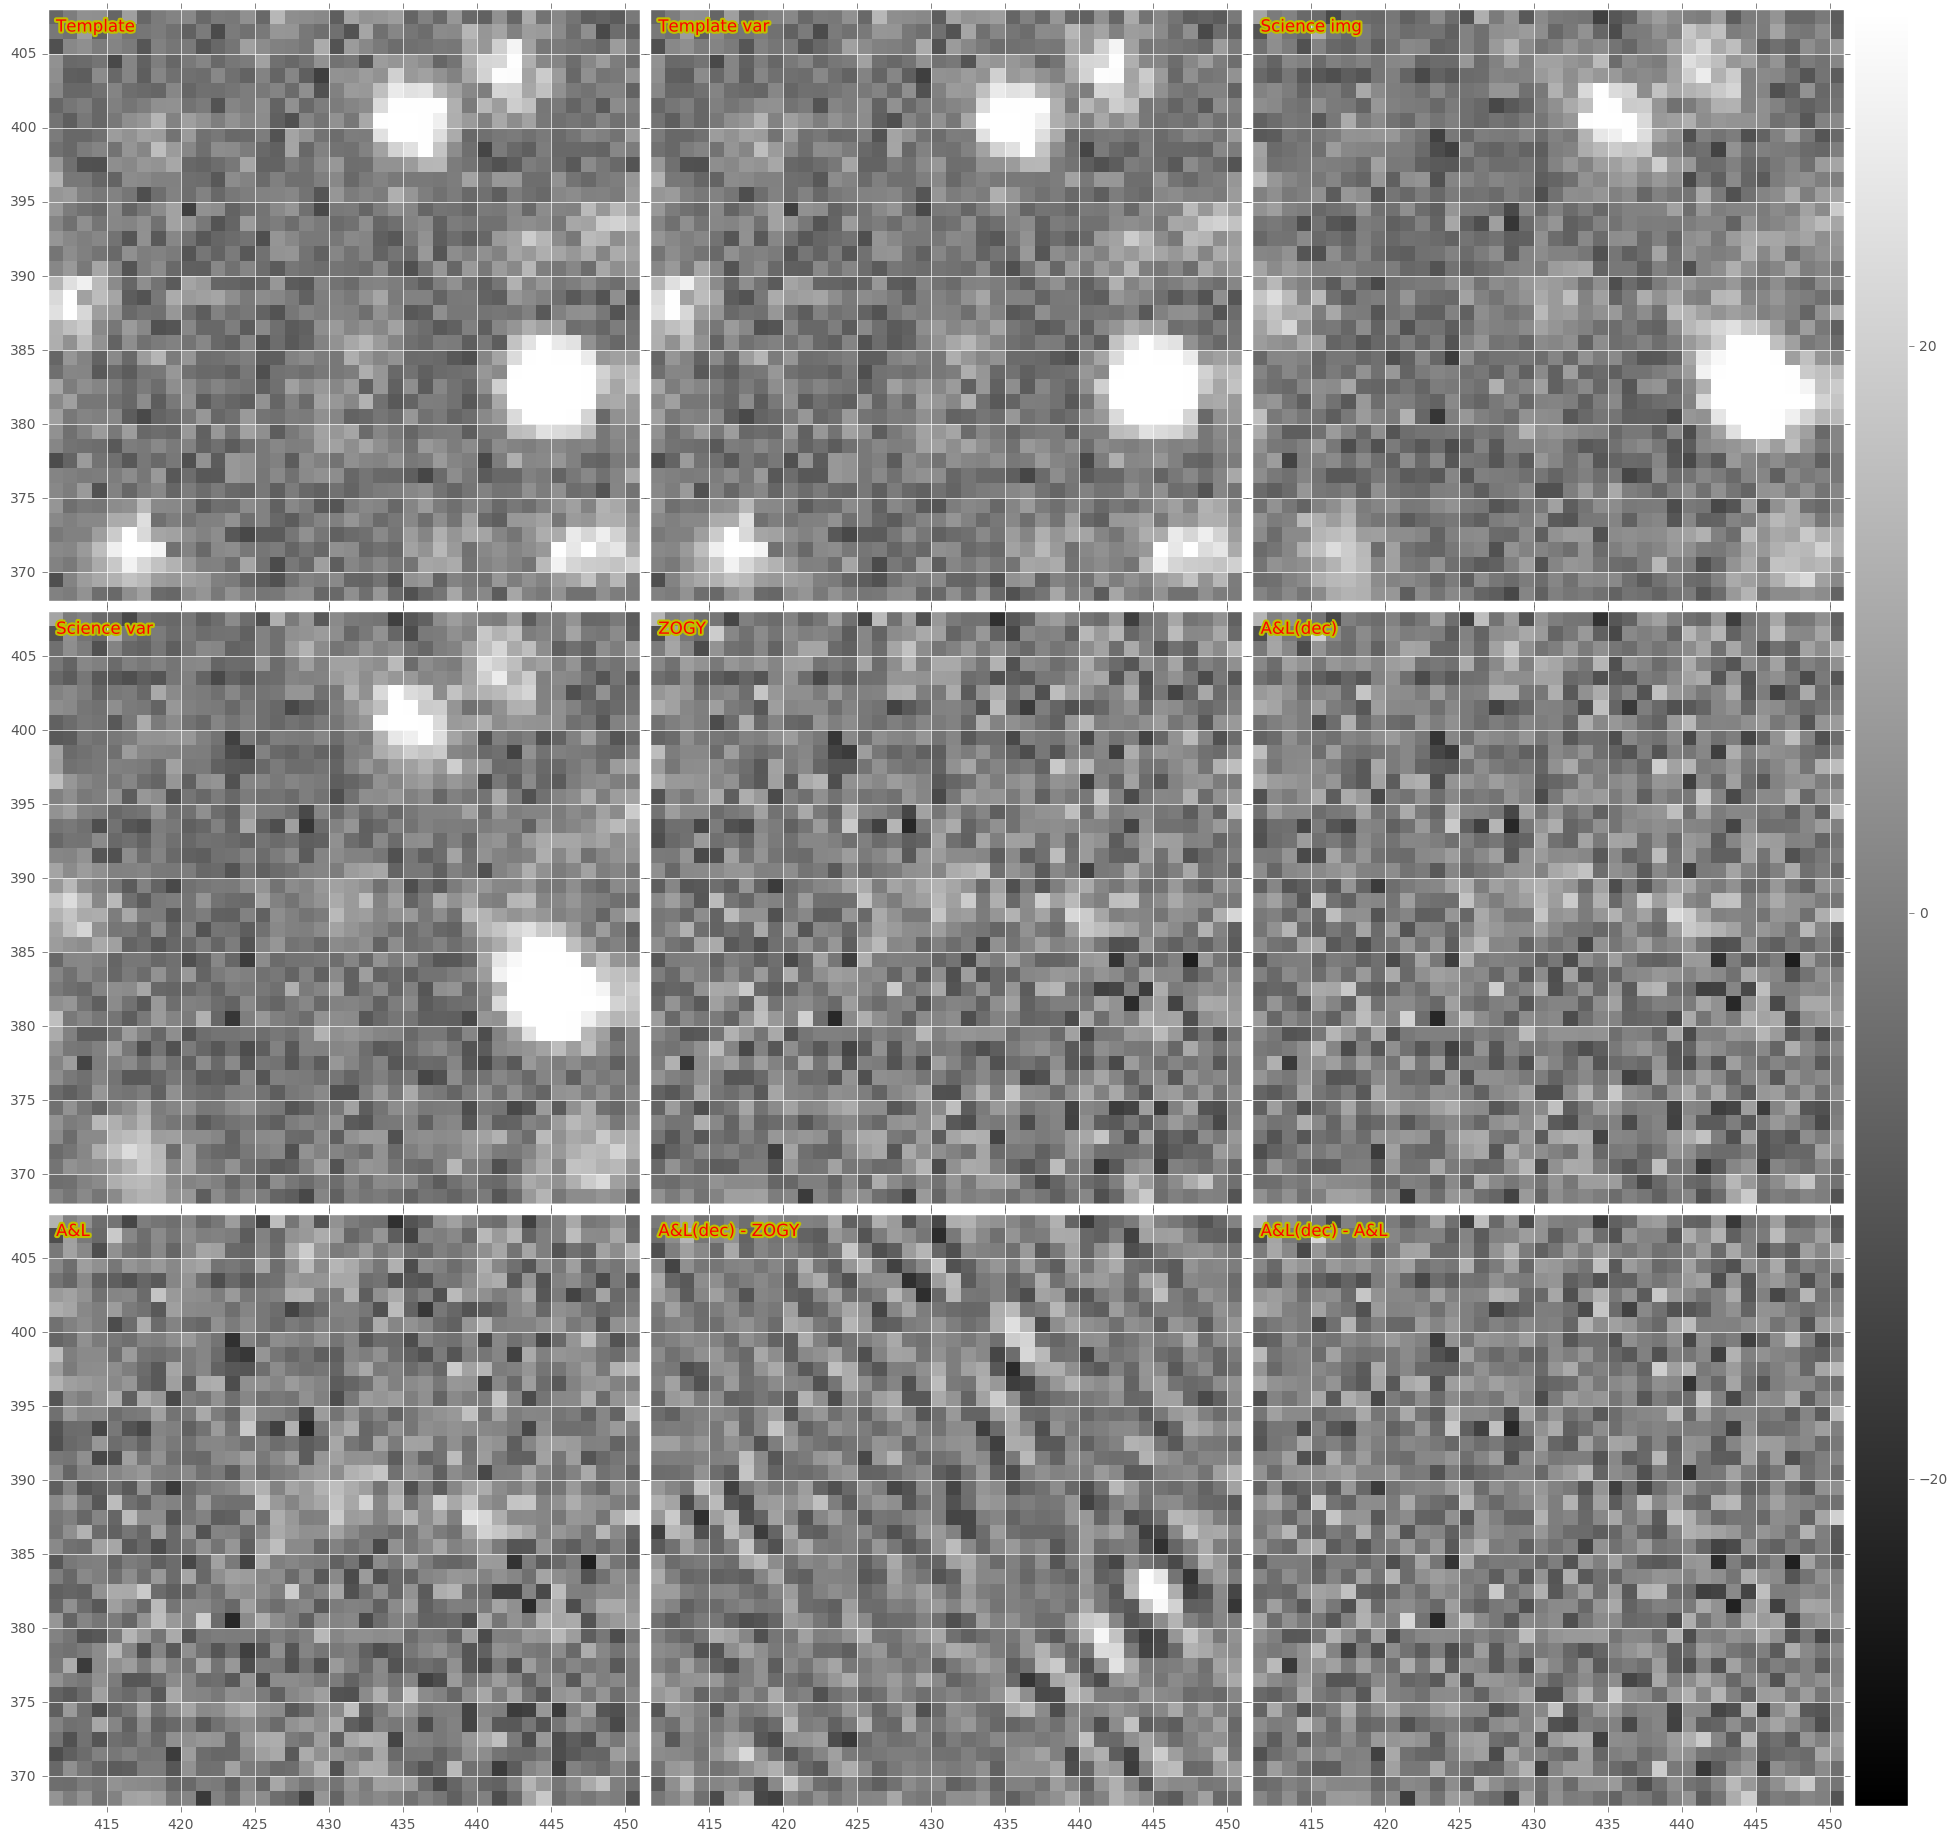

In [6]:
tr['objs'][0].doPlot(centroidCoord=[431, 388, 20], imScale=8);

stats(mean=0.0, stdev=9.0513710771225609e-18, min=-5.8980598183211441e-17, max=5.8980598183211441e-17)
1.0 1.0 0.0119641688919


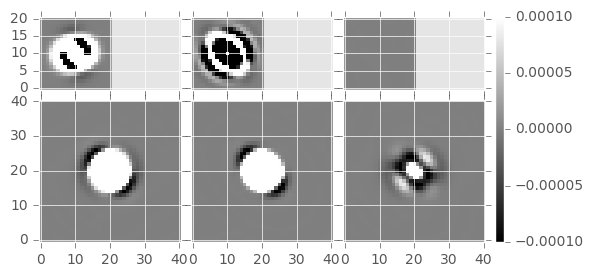

In [7]:
ALk = dit.afw.alPsfMatchingKernelToArray(tr['objs'][0].ALres.psfMatchingKernel, tr['objs'][0].ALres.decorrelatedDiffim)
ALpsf = dit.afw.afwPsfToArray(tr['objs'][0].ALres.decorrelatedDiffim.getPsf(), tr['objs'][0].ALres.decorrelatedDiffim)
decorrK = tr['objs'][0].ALres.decorrelationKernel
tmp = decorrK - decorrK[::-1, ::-1]
print dit.computeClippedImageStats(tmp, low=0, high=0)
print ALpsf.sum(), tr['objs'][0].D_ZOGY.psf.sum(), np.abs(ALpsf-tr['objs'][0].D_ZOGY.psf).sum()
dit.plotImageGrid((ALk, decorrK, tmp, ALpsf, tr['objs'][0].D_ZOGY.psf, ALpsf-tr['objs'][0].D_ZOGY.psf), clim=(-0.0001, 0.0001))

[[ nan  nan]
 [ nan  nan]]


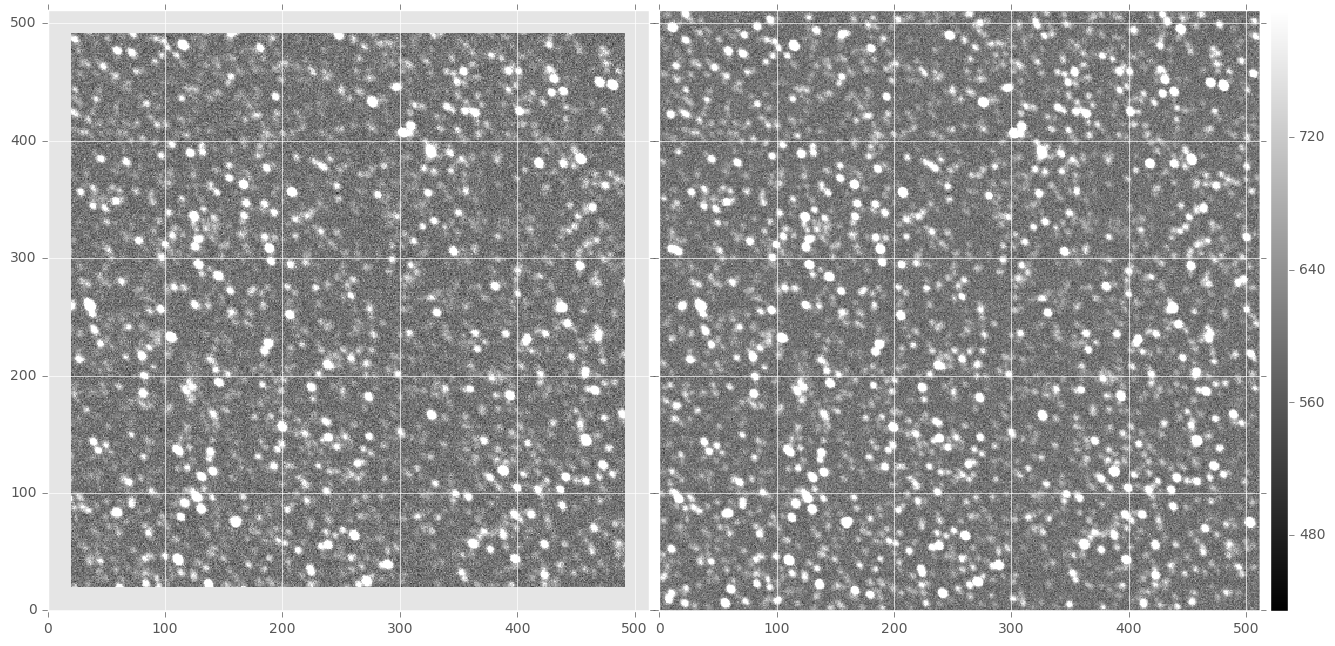

In [8]:
print tr['objs'][0].ALres.decorrelatedDiffim.getMaskedImage().getVariance().getArray()[1:3,1:3]
dit.plotImageGrid((tr['objs'][0].ALres.decorrelatedDiffim.getMaskedImage().getVariance(),
                  tr['objs'][0].D_ZOGY.var), imScale=8)